# 2D SDF Visualisation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tikzplotlib

In [3]:
def length(p):
    return linalg.norm(p,axis=2)

In [4]:
def circle(p, rad = 1):
    return length(p)-rad 

In [5]:
def render(f):
    o = (f>0).astype(float16)+0.3
    o -= (f%1>0.9)*0.6
    return clip(o,0,1)

## Rasterized 2D SDF

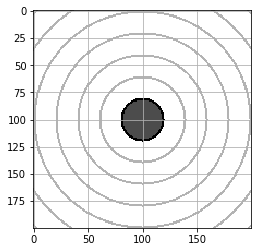

In [17]:
figure(frameon=False)
x = arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)
xx, yy = np.meshgrid(x, y)
p = np.array([xx,yy]).T
d = circle(p)
color = render(d)
imshow(color.astype(np.float32), cmap='gray')
grid()
fName = "sdf2d"
# tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".png", float_format='.4f')
plt.show()

# Visualization of Sphere tracing Process

In [7]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

## Noise function to generate more interesting terrain

In [8]:
# FROM https://github.com/pvigier/perlin-numpy/blob/master/perlin2d.py

def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:  ,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:  ,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)
        
    
np.random.seed(0)
noise = generate_perlin_noise_2d((1024, 1024), (8, 8))
# plt.imshow(noise, cmap='gray', interpolation='lanczos')
# plt.colorbar()

# plt.colorbar()
# plt.show()

In [9]:
def ground(p):
    return p[:,:,0]+2.5+noise[0,(p[:,:,1]*20).round().astype(int16)]*2

In [10]:
def wall(p):
    return -p[:,:,1]+3

In [11]:
def myMap(p):
    d = minimum(ground(p),wall(p))
    return d

In [12]:
from matplotlib.patches import Arrow
from matplotlib.patches import Circle

def draw_arr(ax,x,y,x1,y1,col='k'):
    """
    Draw an arrow in axis coordinates
    """
    p = Arrow(y,x,y1-y,x1-x,width=50,facecolor='k',fill=True)
#     p = Circle((y, x), r,facecolor=fillc,fill=fill,edgecolor=col)
    ax.add_artist(p)

def draw_circle(ax,x,y,r,col='k', fillc='w', fill=False):
    """
    Draw a circle in axis coordinates
    """

    p = Circle((y, x), r,facecolor=fillc,fill=fill,edgecolor=col)
    ax.add_artist(p)


def trace(ax,ro, res= 300):
    tmin = 0.1
    rd = array([0,1.])
    p = ro
    roDraw=(ro/20+0.5)*res
    draw_circle(ax,roDraw[:,:,0],roDraw[:,:,1],5*200/res,col='b')
    t = 0.01
    lastP = roDraw
    for i in range(100):
#         draw_circle(ax,ro[:,:,0],ro[:,:,1],0.1)
        d = myMap(p)
    
        pDraw = (p/20+0.5)*res
        draw_circle(ax,pDraw[:,:,0],pDraw[:,:,1],(d/20)*res)
        
        t += d
        p = ro+t*(rd)
        
        
        draw_circle(ax,pDraw[:,:,0],pDraw[:,:,1],1*res/200,col='r',fillc='r', fill=True)
        draw_arr(ax,lastP[:,:,0],lastP[:,:,1],pDraw[:,:,0],pDraw[:,:,1])
        lastP = pDraw

        if d<tmin:
            d = myMap(p)
            t += d
            p = ro+t*(rd)
            pDraw = (p/20+0.5)*res
            break

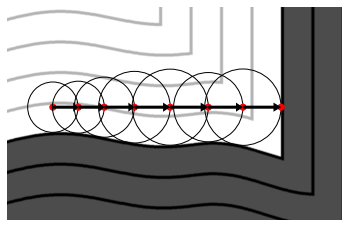

In [16]:
# figure(figsize=[10,10])
figure(frameon=False)
res = 2000
x = linspace(-10, 10, res)
y = linspace(-10, 10, res)
xx, yy = np.meshgrid(x, y,)
p = np.array([xx,yy]).T
d = myMap(p)#minimum(ground(p),wall(p))+3
# d = circle(p)
color = render(d)
imshow(color.astype(np.float32), cmap='gray', origin='lower',interpolation='quadric')
# grid()
# xlabel('x coordinate')
# ylabel('y coordinate')
fName = "sdf2d"
# tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')


ax = plt.gca()
ax.set_aspect(1.)
xlim([400,1500])
ylim([500,1200])
# grid()
plt.axis('off')

trace(ax,array([[[-1.3,-4.5]]]), res=res)
fName = 'sphereTracingViz'
# tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')
# plt.savefig("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".png")
plt.show()


In [34]:
def rect(p):
    r = array([1,1])
    return length(clip(abs(p)-r, 0, 10e10))-0.7

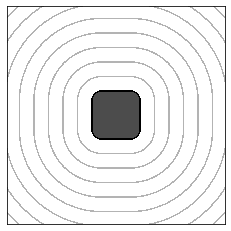

In [63]:
figure(frameon=False)
res = 2000
x = linspace(-7.5, 7.5, res)
y = linspace(-7.5, 7.5, res)
xx, yy = np.meshgrid(x, y)
p = np.array([xx,yy]).T
d = rect(p)
color = render(d)
imshow(color.astype(np.float32), cmap='gray')

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False,
    left=False,
    right=False)

fName = "sdf2dbox"
# plt.savefig("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".png",dpi=300)
plt.show()